# Experimento 6
## Diodo Zener - Melhorado


In [185]:
import numpy as np
import matplotlib.pyplot as plt

from numpy import sin, pi,cos
kb = 8.617*10**(-5) #eV/K

%matplotlib inline

In [186]:
def mmq(x, y, f):
    """
    Encontrar os valores a e b que melhor aproximam a função genérica f(x):
    f(x) = c0 * f[0](x) + c1 * f[1](x) + ... + c{M-1} * f[M-1](x)
    aos pontos (x, y) dados, utilizando o Método dos Mínimos Quadrados Genérico.

    Args:
        x: pontos no eixo x.
        y: pontos no eixo y.
        f: funções de x genéricas.
    
    Returns:
        Retorna os valores dos coeficientes C no formato: [c0, c1, ..., c{M-1}].
    """
    
    # Definindo a matriz F
    F = np.ones((len(x), len(f)))
    for j in range(len(f)):
        F[:,j] = f[j](x)
    
    # Definindo a matriz à esquerda
    left = np.dot(F.transpose(), F)
    
    # Definindo o vetor à direita
    right = np.dot(F.transpose(), y)
    
    # Resolvendo o sistema linear para encontrar os valores dos coeficientes C
    C = np.linalg.solve(left, right)
    return C

In [187]:
def line(x, y):
    """
    Encontrar os valores a e b que melhor aproximam a reta f(x) = ax + b
    aos pontos (x, y) dados, utilizando o Método dos Mínimos Quadrados.

    Args:
        x: pontos no eixo x.
        y: pontos no eixo y.
    
    Returns:
        Retorna os valores de a e b no formato: [a, b].
    """
    
    # Definindo a matriz à esquerda
    left = np.array([[np.sum(x*x), np.sum(x) ],
                     [np.sum(x)  , x.shape[0]]])
    
    # Definindo o vetor à direita
    right = np.array([[np.sum(x*y)],
                      [np.sum(y)  ]])
    
    # Resolvendo o sistema linear para encontrar os valores de a e b
    [a, b] = np.linalg.solve(left, right)
    return [a, b]

## Dados Experimentais

In [188]:
#Dados do Experimento

# Para 1k- 1Quadrante
Va1 = np.array([1, 2, 3, 4, 5, 5.5, 6, 9, 10, 11, 12]) #v
Vb1 = np.array([0.271, 1.225, 2.22, 3.20, 4.20, 4.69,  5.20, 8.20, 9.20, 10.20, 11.20]) #v
i1 = (Vb1/987)
Vab1 = Va1-Vb1

# Para 1M- 3QUadrante
Va2 = np.array([5, 7, 9, 9.52, 9.98, 11, 12 ]) #v
Vb2 = np.array([0.0004, 0.0005, 0.0007,0.001, 0.0152, 0.852, 1.840]) #v
i2 = -(Vb2/(1010*10**3))
Vab2 = -(Va2-Vb2)

# Para 1k- 3QUadrante
Va3 = np.array([9.5, 10, 11, 11.97, 13.02, 14.01]) #v
Vb3 = np.array([0, 0, 0.803, 1.752, 2.74, 3.70]) #v
i3 = -(Vb3/(987))
Vab3 = -(Va3-Vb3)

## 1 Quadrante $V_{DC} > 0$

Valor de C: [2.17194416e-16]


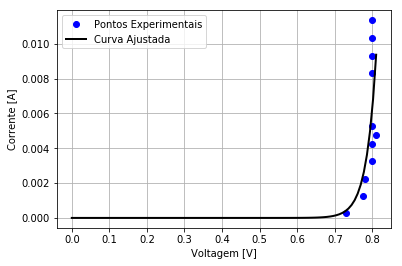

In [189]:
#Constantes
Ut=0.0258
def f1(x):
    return np.exp(x/Ut) -1
f = [f1]

#Ajuste por MMQ
x=Vab1
y=i1
C = mmq(x,y,f)
print ("Valor de C:", C)

## Gerendo o Vetor Maior
X = np.linspace(0.0001, np.nanmax(x), 100)
fx = np.zeros((len(X)))
for j in range(len(f)):
    fx = fx + C[j] * f[j](X)
    
#Grafico
plt.grid("True")
plt.plot(x,y , 'bo')
plt.plot(X,fx , 'k',linewidth=2,label="V>0")
#Legendas
plt.ylabel('Corrente [A]')
plt.xlabel('Voltagem [V]')
plt.legend(['Pontos Experimentais','Curva Ajustada'])
plt.axis('auto')
plt.grid(True)
plt.show()

## Variaveis para o Grafico Final
X = np.linspace(0.0001, np.nanmax(x), 100)
fx = np.zeros((len(X)))
for j in range(len(f)):
    fx = fx + C[j] * f[j](X)
    
Ax = X
Ay = fx
C1 = C

## 3 Quadrante $V_Z< V_{DC}<0$

Valor de C: [-3.42534197e-09]


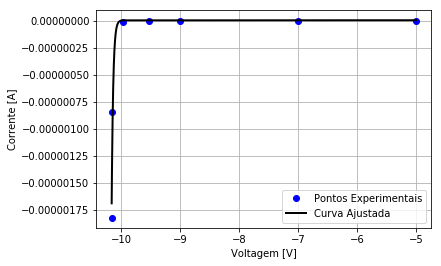

[-3.96039604e-10 -4.95049505e-10 -6.93069307e-10 -9.90099010e-10
 -1.50495050e-08 -8.43564356e-07 -1.82178218e-06]


In [190]:
# Constantes
Ut=0.0258
Vz = 10

def f1(x):
    return np.exp(-(x+Vz)/Ut) -1
f = [f1]

#Ajuste por MMQ
x=Vab2
y=i2
C = mmq(x,y,f)
print ("Valor de C:",C)

## Gerendo o Vetor Maior
X = np.linspace(-5, np.nanmin(x), 1000)
fx = np.zeros((len(X)))
for j in range(len(f)):
    fx = fx + C[j] * f[j](X)
    
#Grafico
plt.grid("True")
plt.plot(x,y , 'bo')
plt.plot(X,fx , 'k',linewidth=2,label="V<Vz")
#Legendas
plt.ylabel('Corrente [A]')
plt.xlabel('Voltagem [V]')
plt.legend(['Pontos Experimentais','Curva Ajustada'])
plt.axis('auto')
plt.grid(True)
plt.show()
print(i2)
## Variaveis para o Grafico Final
X = np.linspace(0.1, -10, 1000)
fx = np.zeros((len(X)))
for j in range(len(f)):
    fx = fx + C[j] * f[j](X)
Bx = X
By = fx
C2 = C

## 3 Quadrante $V_{DC} < V_Z$

Valor de C: [-2.57528169e-08]


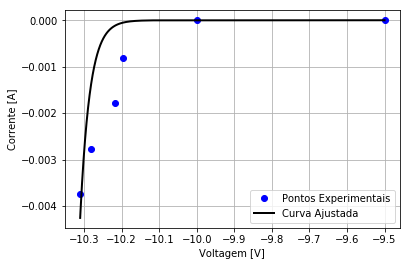

In [191]:
# Constantes
Ut=0.0258
Vz = 10

def f1(x):
    return np.exp(-(x+Vz)/Ut) -1
f = [f1]

#Ajuste por MMQ
x=Vab3
y=i3
C = mmq(x,y,f)
print ("Valor de C:",C)

## Gerendo o Vetor Maior
X = np.linspace(-9.5, np.nanmin(x), 1000)
fx = np.zeros((len(X)))
for j in range(len(f)):
    fx = fx + C[j] * f[j](X)
    
#Grafico
plt.grid("True")
plt.plot(x,y , 'bo')
plt.plot(X,fx , 'k',linewidth=2,label="V<Vz")
#Legendas
plt.ylabel('Corrente [A]')
plt.xlabel('Voltagem [V]')
plt.legend(['Pontos Experimentais','Curva Ajustada'])
plt.axis('auto')
plt.grid(True)
plt.show()
## Variaveis para o Grafico Final

X = np.linspace(-10, np.nanmin(x), 1000)
fx = np.zeros((len(X)))
for j in range(len(f)):
    fx = fx + C[j] * f[j](X)
Cx = X
Cy = fx
C3 = C

# Grafico Final

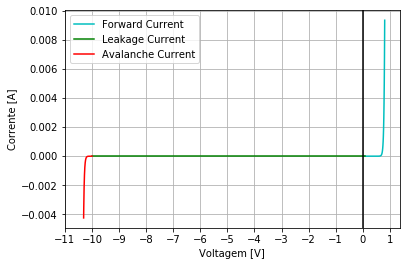

In [192]:
plt.plot(Ax,Ay,'c', label="line1")
plt.plot(Bx,By, 'g', label="line2")
plt.plot(Cx,Cy,'r', label="line3")
# plt.axhline( color='k')
plt.axvline(color='k')
# plt.plot(Ax,Ay,label ="line1",Bx,By,label ="line2",Cx,Cy,label ="line3" , 'k',)

#Legendas
plt.ylabel('Corrente [A]')
plt.xlabel('Voltagem [V]')
plt.legend(['Forward Current','Leakage Current','Avalanche Current'])
# plt.legend((line1, line2, line3), ('label1', 'label2', 'label3'))
plt.axis('auto')
plt.grid(True)
plt.xticks(np.arange(-11, 2, 1))
plt.show()

In [193]:
print (i1)
print (i2)
print (i3)

[0.00027457 0.00124113 0.00224924 0.00324215 0.00425532 0.00475177
 0.00526849 0.008308   0.00932118 0.01033435 0.01134752]
[-3.96039604e-10 -4.95049505e-10 -6.93069307e-10 -9.90099010e-10
 -1.50495050e-08 -8.43564356e-07 -1.82178218e-06]
[-0.         -0.         -0.00081358 -0.00177508 -0.00277609 -0.00374873]


In [194]:
print("SD",C1)
print("SDZ",C2)
print("SDZ",C3)

SD [2.17194416e-16]
SDZ [-3.42534197e-09]
SDZ [-2.57528169e-08]


In [234]:
RD = (Vab1[2] - Vab1[0])/(i1[2]-i1[0]) 
print(RD)

RZ = (Vab3[3] - Vab1[4])/(i1[3]-i1[4]) 
print(RZ)
Vab3


25.827090815802887
10874.766000000001


array([ -9.5  , -10.   , -10.197, -10.218, -10.28 , -10.31 ])